# IPYTHON Workbook

The purpose of this notebook is to give the reader a crash course in python, and in the codes they may need to carry out basic analysis of astrophysical simulations. From being a complete python novice to being able to produce useful data and images using python.


- ###Basic data manipulation
    - Basic math
    - Arrays
    - Random numbers
    - Strings
    - Asking for help

- ###Advanced data manipulation
    - Functions
    - Calculus
    - LaTeX
    - Inputs & Outputs
    - Fake data sets

- ###Logic
    - If
    - For loops
    - Exceptions

- ###Plotting
    - Histograms
    - Line plots
    - Scatter plots
    - Two dimensional histograms
    - Subplots

- ###Astrophysics
    - Angular momentum
    - Simulation
    - Briggs figures (Briggs 1990)
    - Star formation history
    - Pynbody

In [1]:
%%javascript
IPython.load_extensions('calico-spell-check')

<IPython.core.display.Javascript object>

In [4]:
import math
%pylab
from matplotlib import rcParams
%matplotlib inline
rcParams["savefig.dpi"] = 100  # This makes all the plots a little bigger.
import numpy as np

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


##  Basic data manipulation

### Basic math

The easiest things you can get a computer to do are simple calculations, use ipython to solve the following:

1. $(828235 \times 9123) + 6235$
2. $72456/(9442-274)$
3. $2^{214}/54^{-0.5}$

Note: in python if you do a calculation with only integer numbers it will assume you want an integer solution. This means it will round at every step. To stop this form happening you should write the numbers as decimals, i.e. 910 = 910.0

In [10]:
(828235*9123)+6235, 72456.0/(9442.0-274.0), 2**(214.0)/54**(-0.5)

(7555994140, 7.903141361256544, 1.9347103367334089e+65)

### Arrays

The most useful tool for data manipulation is correct use of arrays. In order to get the most out of our arrays we will use the package numpy (for more information: http://www.numpy.org/). To import numpy you can use the following command:

In [11]:
import numpy as np

To initialize an array in python you have two options:
1. array = []
2. array = np.array([])

Although the top one seems the better option for speed you may find that this isn't the case. The top choice will create a python list, and these lists don't support some linear operations. For example if you have two lists and you want to multiply them it will take more code than to multiply two np.array's. Thus, I would always recommend using the second option even though it takes a few more seconds to initialize.

Define the following two arrays:
A = [1,6,2,5,8,9]
B = [6,2,4,7,9,2]

Using A and B, solve the following problems:
1. $A \times B$
2. $A/B$
3. $A^2 \times B$

In [12]:
A = np.array([1.0,6.0,2.0,5.0,8.0,9.0])
B = np.array([6.0,2.0,4.0,7.0,9.0,2.0])
A*B, A/B, A**2*B

(array([  6.,  12.,   8.,  35.,  72.,  18.]),
 array([ 0.16666667,  3.        ,  0.5       ,  0.71428571,  0.88888889,
         4.5       ]),
 array([   6.,   72.,   16.,  175.,  576.,  162.]))

### Random numbers

Random numbers come in handy allot! Therefore, I will give you a brief introduction to them, however, I will say random numbers is a huge area in computing. For the sake of brevity we will only look at the easiest way of generating sudo-random numbers. Firstly, we import the package random

In [13]:
import random

Now for the first example I will generate a list of random numbers,

In [14]:
samp = random_integers(-200, 200, 10)

now I will randomly shuffle this list,

In [15]:
shuffle(samp)

and finally I will pick a number at random from this list,

In [16]:
random.choice(samp)

-154

Try this:

Generate a 10 random numbers from a GAUSSIAN distribution

In [17]:
randn(10)

array([-0.17532034, -1.7904576 , -0.83215266,  0.31694673,  0.31068377,
        0.49438891,  0.70492452, -1.80475441, -0.15953326, -2.14792576])

### Strings

A different type of variable, called a string, can be used to save strings of characters. For example

In [18]:
welcome = str('welcome to sparta')
welcome

'welcome to sparta'

Here we have saved 'welcome to sparta' as a string called welcome. So when we tell it to return welcome it returns the string we saved to it. This can be used for a number of things that will be come clear later on.

### Asking for help

Sometimes you just completely forget how a command works and what information it needs to work. To find out quickly you can either look online, or just type in something like this

In [19]:
random.choice?

This should give you the basic idea of how the code works, but might not be so easy to understand.

## Advanced data manipulation

### Functions

For a number of processes in python it is useful to define functions that can be called instead of writing the function out in full every time. For example:

$f = \sin(x)\cos(x)\Big|_{x=1}$

In [20]:
def f(x):
    return sin(x)*cos(x)

f(1)

0.45464871341284091

Try it for yourself:

1. $f(x) = \sin(x)\tan(x)\Big|_{x=0.5}$
2. $f(x) = \log_{10}(x)\cos(x)\Big|_{x=1.7}$
3. $f(x,y) = \sin(x)\cosh(y)\Big|_{x=1, y=0.5}$

In [21]:
def f1(x):
    return sin(x)*tan(x)

def f2(x):
    return log10(x)*cos(x)

def f3(x,y):
    return sin(x)*cosh(y)

f1(0.5), f2(1.7), f3(1,0.5)

(0.26191136543417637, -0.029692074735932817, 0.94886453143716798)

### Calculus

Another use of python is numerical calculus, this isn't the same as analytical calculus that you learn at school. Here python will try to approximate the value of an integral or derivative based on a given numerical recipe (for more information http://en.wikipedia.org/wiki/Numerical_integration, http://en.wikipedia.org/wiki/Numerical_differentiation)

Firstly, lets try to solve the differential equation:

$\frac{dy}{dx} = \frac{d}{dx} (x^3 + x^2)\Big|_{x=1}$

In [22]:
from scipy.misc import derivative

def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-6)

4.9999999999217337

Now lets try to solve the integral

$y = \int_{0}^{1} 3x^2 + 2x \; dx$

In [23]:
from scipy.integrate import quad

def f(x):
    return 3*x**2 + 2*x

quad(f, 0, 1)

(2.0, 2.220446049250313e-14)

### LaTeX

This is a huge subject on type setting documents, however, for the purposes of these projects all you will need to know is how to type set equations using LaTeX. For this i would use the wikipedia pages: 

http://en.wikibooks.org/wiki/LaTeX/Mathematics
http://en.wikibooks.org/wiki/LaTeX/Advanced_Mathematics

However, i have written all the equations in this document using LaTeX so this should help you find useful examples.

### Inputs and outputs

There are a vast number of ways to read in data and write data in python, but we will just be using one very simple method. Although its very simple its also very powerful and can be used for many different applications. We will be using the numpy command genfromtxt. Below i will input some velocities from a file named testdata.txt to an array called velocities and then play around with them. I sort them, then find the maximum, minimum, mean, standard deviation, and median.

In [24]:
velocities = genfromtxt('testdata.txt')
velocities = sort(velocities)

In [25]:
from scipy import stats
max(velocities), min(velocities), mean(velocities), std(velocities), median(velocities)

(3.3588414549648875,
 -3.6098202720123496,
 0.052285122310087771,
 0.98559720109511151,
 0.0170960684341076)

Now I will save the sorted data to a text file for use later.

In [26]:
savetxt('sorteddata.txt', velocities)

### Fake data sets

Here we will quickly look at how to generate more fake data for testing code with. Firstly, lets generate some integers. Range generates a list of integers between the two values you specify,

In [27]:
range(1,10)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

however, integers are not very useful. Lets try to make a list of floats instead!

In [28]:
linspace(1,10,19)

array([  1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,
         5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ])

Although these commands seem very easy and you might think they are pointless, infact they can be incredibly powerful in a number of situations. Lets try something more useful, say we have a function

$f(x) = \frac{\sin(x)\log_{10}(x)}{\cosh(x)}$,

we can use linspace to quickly evaluate this function within the range $1 < x < 10$.

In [29]:
def f(x):
    return (sin(x)*log10(x))/cosh(x)

dat = linspace(1,10, 19)
f(dat)

array([  0.00000000e+00,   7.46681815e-02,   7.27569279e-02,
         3.88363940e-02,   6.68788397e-03,  -1.15158368e-02,
        -1.66850966e-02,  -1.41852135e-02,  -9.03193329e-03,
        -4.26942567e-03,  -1.07789125e-03,   5.25823397e-04,
         1.01258588e-03,   9.07951259e-04,   5.99457912e-04,
         3.01999556e-04,   9.70645189e-05,  -1.09997794e-05,
        -4.93970403e-05])

OK, now you can have a good at this. For the evaluate the functions $f$ within the given range using an appropriate interval.

1. $f(x) = \frac{\cos(x)\log_{10}(x)}{\sinh(x)}$; for $1 < x < 10$
2. $f(x) = \frac{\arccos(x)}{\log(x)}$; for $0.1 < x < 0.5$
3. $f(x,y) = \tanh(x)\log_{10}(y)$; for $1 < x < 5$ and $10 < y < 20$

In [30]:
def f(x):
    return (cos(x)*log10(x))/sinh(x)

dat = linspace(1,10, 19)
f(dat)

array([  0.00000000e+00,   5.84996153e-03,  -3.45402542e-02,
        -5.26936070e-02,  -4.71503653e-02,  -3.07989867e-02,
        -1.44204422e-02,  -3.05967202e-03,   2.67200513e-03,
         4.28850611e-03,   3.70406035e-03,   2.38710939e-03,
         1.16195984e-03,   3.35531102e-04,  -8.81593360e-05,
        -2.27689764e-04,  -2.14594653e-04,  -1.45954895e-04,
        -7.61875771e-05])

In [31]:
def f(x):
    return arccos(x)/(log(x))

dat = linspace(0.1,0.5, 19)
f(dat)

array([-0.63868602, -0.68902318, -0.73692391, -0.78322357, -0.82849444,
       -0.87315827, -0.91754539, -0.96192858, -1.00654398, -1.05160488,
       -1.0973114 , -1.14385783, -1.19143846, -1.24025273, -1.29051002,
       -1.34243449, -1.3962702 , -1.4522869 , -1.51078671])

In [32]:
def f(x,y):
    return tanh(x)*log10(y)

datx = linspace(1,5, 19)
daty = linspace(10,20, 19)
f(datx, daty)

array([ 0.76159416,  0.86003983,  0.93552301,  0.99344441,  1.03852854,
        1.07446984,  1.10397897,  1.12897093,  1.15076875,  1.1702752 ,
        1.18810295,  1.20466777,  1.2202531 ,  1.23505392,  1.24920618,
        1.26280637,  1.27592458,  1.28861304,  1.30091187])

## Logic

### If

One of the most important things in any programming language is the ability to get the computer to make logical decision. So what can a computer tell you? Well, it can answer simple questions, for example is $1=1$, or is $1=2$?

In [33]:
1==1, 1==2

(True, False)

Now it has answered that burning question, what about this one is $1 > 3$ or is $1 < 3$?

In [34]:
1>3, 1<3

(False, True)

There are only a few things you can ask a computer, one of the most important is the if statement. For example lets write a simple function that can respond in two ways. Firstly, if the function is passed the number 1 it will respond by saying 'hello', and if its passed anything else it will respond with a 'bye'.

In [35]:
def greeting(x):
    if x == 1:
        return 'hello'
    else:
        return 'bye'

greeting(1), greeting(0)

('hello', 'bye')

Of course this is a very simple use of an if statement and you will be using it for much more complex code, but the general idea will be the same. You will ask the computer is $x = y$ or is $x \neq y$. Another way of writing the code would be

In [36]:
def greeting(x):
    lgc = (x==1)
    if lgc:
        return 'hello'
    else:
        return 'bye'

greeting(1), greeting(0)

('hello', 'bye')

here we assign the answer to the question is $x = 1$ to a variable called lgc. Now you can have a go at getting the computer to answer some questions. Find a true or false answer to the following

1. is $\sin(x) > \cos(x)\Big|_{x=0.5}$
2. is $\tan(x) > \sin(x)\Big|_{x=0.4}$
3. is $\tanh(x) > \cot(x)\Big|_{x=0.7}$

In [37]:
sin(0.5)>cos(0.5), tan(0.4)>sin(0.4), tanh(0.7)>(1/tan(0.7))

(False, True, False)

### For loops

Arguably the most important thing in all programming is the ability to make the computer continue to do something until come criteria are met. The for loop lets you loop over a piece of code until it has achieved what you want. Lets do an example, say we want the computer to tell us the product of the first 10 even numbers. In mathematical notation this would look like

$y = \prod_{i=1}^{20} x_i$,  for $2\big|x_i$

or

$y = 2 \times 4  \times 6  \times 8  \times 10  \times 12  \times 14 \times 16 \times 18 \times 20$

Now lets write a code that does this for us!

In [38]:
x=1
for i in range(1,21):
    if i % 2 == 0:
        x=x*i
    
x == 2*4*6*8*10*12*14*16*18*20, x

(True, 3715891200)

There are a couple of things to note here, 1. we have to tell it to go up to 21, this is because loops run from 0 to x so the end must be one larger than you think, 2. we were able to use the range command to set up the loop, and 3. the % finds the remainder so if this is zero then one divides the other. Use a for loop to find the solutions to the following problems:

1. find the product of the first 20 odd numbers,
2. find the product of all the integers between $50 < x < 60$,
3. find the product of the first 20 prime numbers.

### Exceptions

Sometimes code just doesn't work for some reason. For example lets say I'm working on adding up all the numbers in a bunch of different files and some of the files are missing. I don't want the code to not work just because some of the files are missing. I want it to add up the ones that do exist and tell me which ones are missing! Lets try to do this with some fake data

In [64]:
sum=0
for i in range(1,7):
    var = 'a' + str(i) + '.txt'
    try: 
        am = genfromtxt(var)
        sum = sum+am
    except:
        print 'Error with file: ', var
        pass
    
print sum

Error with file:  a3.txt
Error with file:  a6.txt
596.0


## Plotting

Plotting is one of the most important things we do in science, its the best way of showing data and comparing variables to determine if there might by connections between the dimensions you are interested in. First lets import the libraries we will be using to make our plots.

In [67]:
%pylab
from matplotlib import rcParams
%matplotlib inline
rcParams["savefig.dpi"] = 100  # This makes all the plots a little bigger.

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Histograms

The easiest plot to create is always the one the with the fewest dimensions, a histogram has only one real dimension, the thing on the x axis. The y axis is just the number of counts for that bin. Lets try to make some histograms using python and the package matplotlib (here is the link to the matplotlib gallery, find the plot you want to make from these images and it will give you guide on how to make it! http://matplotlib.org/gallery.html). We will use the velocities we used before in the inputs and outputs section.

(array([   2.,   12.,   37.,  140.,  247.,  272.,  184.,   78.,   20.,    8.]),
 array([-3.60982027, -2.9129541 , -2.21608793, -1.51922175, -0.82235558,
        -0.12548941,  0.57137676,  1.26824294,  1.96510911,  2.66197528,
         3.35884145]),
 <a list of 10 Patch objects>)

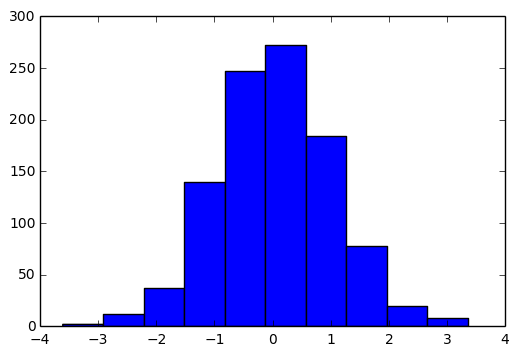

In [68]:
velocities = genfromtxt('sorteddata.txt')
plt.hist(velocities)

Now, this is an extremely simple histogram and is missing a bunch of stuff, so lets start adding it in!

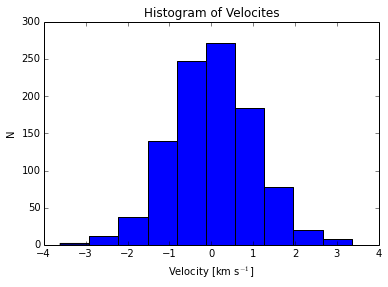

In [46]:
plt.hist(velocities)
# Add the x-axis label (remember units!)
plt.xlabel('Velocity [km s$^{-1}$]')
# Add the y-axis label
plt.ylabel('N')
# Add a title
plt.title('Histogram of Velocites')

Use the web to find ways to change the following things about this plot:

1. change bar colour,
2. change number of bins,
3. set the bins manually.

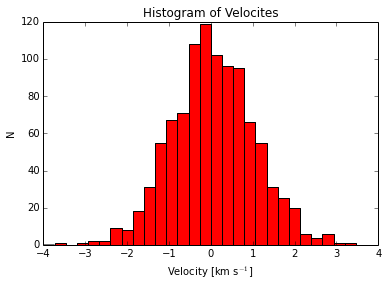

In [47]:
plt.hist(velocities, bins=linspace(-4, 4, 31), color='red')
# Add the x-axis label (remember units!)
plt.xlabel('Velocity [km s$^{-1}$]')
# Add the y-axis label
plt.ylabel('N')
# Add a title
plt.title('Histogram of Velocites')

OK, great! Now we have a plot with all the bells and whistles. However, this is still a very basic plot. Lets move on to more interesting plots!

### Scatter plots

The next type of plots that will come in handy are scatter plots. Here you are measuring two dimensions, a dependent variable on the y-axis and an independent variable on the x-axis. Lets first input the second dimension, in this case its the radius.

In [48]:
radius = genfromtxt('radius.txt')

Now lets make a scatter plot of velocity versus radius.

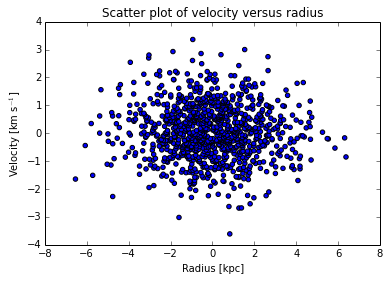

In [49]:
plt.scatter(radius, velocities)
plt.xlabel('Radius [kpc]')
plt.ylabel('Velocity [km s$^{-1}$]')
plt.title('Scatter plot of velocity versus radius')

Use the web to find ways to make the following changes to the plot:

1. change the plots to crosses,
2. change the transparency of the points,
3. add a point for the mean.

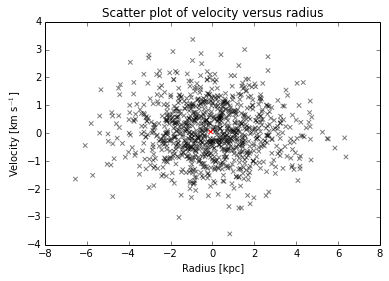

In [50]:
plt.scatter(radius, velocities, marker='x', alpha=0.5, color='black')
plt.scatter(mean(radius), mean(velocities), marker='x', color='red', s=20)
plt.xlabel('Radius [kpc]')
plt.ylabel('Velocity [km s$^{-1}$]')
plt.title('Scatter plot of velocity versus radius')

### Line plots

Another great way of showing relationships --- especially if you have a good idea of what the relationship should look like --- is the use of a line plot. For an example lets take the fake velocities and radii used previously. Now in order to produce a line plot that makes sence we should first sort the data. To do this we choose to sort the data by their radius. This should give us a line from low radius to high. To sort the data we first have to combine the two arrays into a single array to use np.argsort.

In [51]:
xy = zip(radius,velocities)
xy = np.array(xy)

This gives us one array xy which contains all the data, the first column contains the radii and the second column contains the velocities. Now we need to sort this array with respect to the first column.

In [52]:
xy = xy[xy[:,0].argsort()]
x = xy[:,0]
y = xy[:,1]

Now we have two arrays x and y, both sorted with respect to the radius. Now we can plot these using the line plot command plt.plot

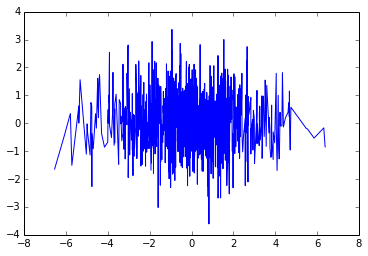

In [53]:
plt.plot(x,y)

As you can see there is a problem, this is due to the way in which i generated the fake data. In order to fix this i will sort the velocity array with respect to its self. DO NOT DO THIS FOR REAL DATA.

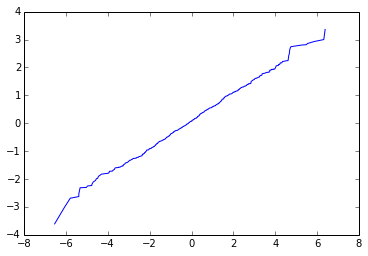

In [54]:
y = y[y.argsort()]
plt.plot(x,y)

Here are a few things for you to try to do:

1. Add labels to the axes and a title.
2. Calculate a line that fits this data. (hint: numpy.polyfit)
3. Add the line to the plot and use a legend.

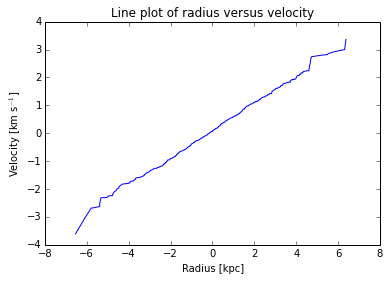

In [55]:
plt.plot(x,y)
plt.xlabel('Radius [kpc]')
plt.ylabel('Velocity [km s$^{-1}$]')
plt.title('Line plot of radius versus velocity')

In [56]:
z = np.polyfit(x, y, 1)
z

array([ 0.49243506,  0.09346161])

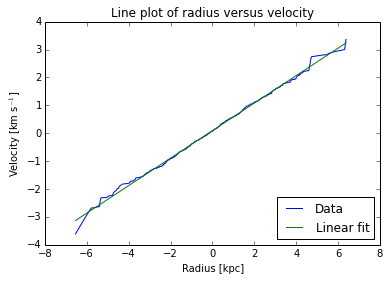

In [57]:
fitx = linspace(min(x),max(x),len(x))
fity = z[0]*fitx+z[1]
plt.plot(x,y, label='Data')
plt.plot(fitx,fity, label='Linear fit')
plt.xlabel('Radius [kpc]')
plt.ylabel('Velocity [km s$^{-1}$]')
plt.title('Line plot of radius versus velocity')
plt.legend(loc='lower right')

### 2D Histograms

Now we can move onto a more complex, but great way of showing data. A two dimensional histogram shows the distribution of data with respect to two parameter spaces. In this case we will use the same example, the radius and velocity parameter space..

(array([[  0.,   0.,   1.,   1.,   1.,   2.,   1.,   1.,   0.,   0.],
        [  0.,   1.,   0.,   4.,   5.,   5.,   3.,   3.,   0.,   0.],
        [  0.,   0.,   2.,  10.,  10.,  23.,  12.,   3.,   2.,   2.],
        [  1.,   1.,   4.,  18.,  38.,  45.,  25.,  14.,   6.,   1.],
        [  0.,   2.,  14.,  35.,  69.,  68.,  50.,  19.,   7.,   2.],
        [  1.,   2.,   9.,  31.,  63.,  60.,  55.,  14.,   3.,   1.],
        [  0.,   5.,   5.,  24.,  36.,  38.,  22.,  20.,   1.,   1.],
        [  0.,   1.,   1.,   9.,  15.,  23.,  11.,   2.,   1.,   1.],
        [  0.,   0.,   1.,   7.,   6.,   7.,   5.,   2.,   0.,   0.],
        [  0.,   0.,   0.,   1.,   4.,   1.,   0.,   0.,   0.,   0.]]),
 array([-6.54667866, -5.25384676, -3.96101485, -2.66818294, -1.37535104,
        -0.08251913,  1.21031277,  2.50314468,  3.79597659,  5.08880849,
         6.3816404 ]),
 array([-3.60982027, -2.9129541 , -2.21608793, -1.51922175, -0.82235558,
        -0.12548941,  0.57137676,  1.26824294,  1.965109

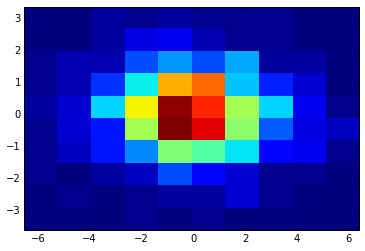

In [58]:
plt.hist2d(radius, velocities)

Now try to do the following:

1. Label the axes and give it a title.
2. Change the number of bins to something more reasonable.
3. Add a labeled colour bar.

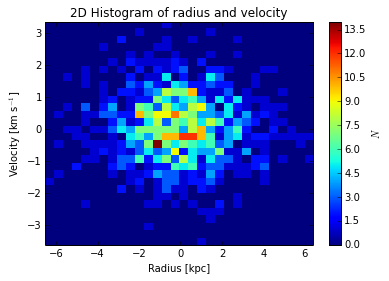

In [59]:
plt.hist2d(radius, velocities, 30)
plt.colorbar(label='$N$')
plt.xlabel('Radius [kpc]')
plt.ylabel('Velocity [km s$^{-1}$]')
plt.title('2D Histogram of radius and velocity')

### Subplots

It is often convenient to plot two things next to each other in order to show a comparison. This is where subplots come in handy. For this example is will make a simple 2 by 2 grid of plots from the plots we have already created. The plot will be organized as follows:

Histogram, Scatter

Lineplot, 2D histogram

(array([[  0.,   0.,   1.,   1.,   1.,   2.,   1.,   1.,   0.,   0.],
        [  0.,   1.,   0.,   4.,   5.,   5.,   3.,   3.,   0.,   0.],
        [  0.,   0.,   2.,  10.,  10.,  23.,  12.,   3.,   2.,   2.],
        [  1.,   1.,   4.,  18.,  38.,  45.,  25.,  14.,   6.,   1.],
        [  0.,   2.,  14.,  35.,  69.,  68.,  50.,  19.,   7.,   2.],
        [  1.,   2.,   9.,  31.,  63.,  60.,  55.,  14.,   3.,   1.],
        [  0.,   5.,   5.,  24.,  36.,  38.,  22.,  20.,   1.,   1.],
        [  0.,   1.,   1.,   9.,  15.,  23.,  11.,   2.,   1.,   1.],
        [  0.,   0.,   1.,   7.,   6.,   7.,   5.,   2.,   0.,   0.],
        [  0.,   0.,   0.,   1.,   4.,   1.,   0.,   0.,   0.,   0.]]),
 array([-6.54667866, -5.25384676, -3.96101485, -2.66818294, -1.37535104,
        -0.08251913,  1.21031277,  2.50314468,  3.79597659,  5.08880849,
         6.3816404 ]),
 array([-3.60982027, -2.9129541 , -2.21608793, -1.51922175, -0.82235558,
        -0.12548941,  0.57137676,  1.26824294,  1.965109

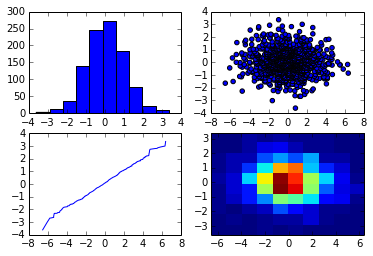

In [60]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.hist(velocities)
ax2.scatter(radius, velocities)
ax3.plot(x,y)
ax4.hist2d(radius,velocities)

Your task:

1. Go back through your solutions to the previous questions in this sections and add all your updated plots to this figure.
2. Change the orientation of the histogram to be horizontal and make all the plots share the same x axis values.

Note: adding a colour bar to a subplot can be tricky, you can look at the answers if you need to.

Tip: using plt.tight_layout() at the end can solve allot of formatting problems for you.

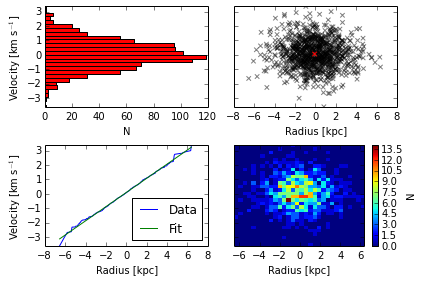

In [61]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
ax1.hist(velocities, bins=linspace(-4, 4, 31), color='red', orientation=u'horizontal')
ax1.set_ylabel('Velocity [km s$^{-1}$]')
ax1.set_xlabel('N')

ax2.scatter(radius, velocities, marker='x', alpha=0.5, color='black')
ax2.scatter(mean(radius), mean(velocities), marker='x', color='red', s=20)
ax2.set_xlabel('Radius [kpc]')
#ax2.set_ylabel('Velocity [km s$^{-1}$]')
ax2.set_xlim()

fitx = np.linspace(np.min(x),np.max(x),len(x))
fity = z[0]*fitx+z[1]
ax3.plot(x,y, label='Data')
ax3.plot(fitx,fity, label='Fit')
ax3.set_xlabel('Radius [kpc]')
ax3.set_ylabel('Velocity [km s$^{-1}$]')
ax3.legend(loc='lower right')

dx,dy,dz,img = ax4.hist2d(radius, velocities, 30)
#ax4.colorbar(label='$N$')
ax4.set_xlabel('Radius [kpc]')
#ax4.set_ylabel('Velocity [km s$^{-1}$]')
cbar = plt.colorbar(img, label='N')
plt.tight_layout()

## Astrophysics

### Angular Momentum

So now is the time to do some thinking about physics and astronomy. The first thing we are going to look at is angular momentum. The Angular momentum of a system can be thought of in two ways. For a continuous system, we can use the integral

$\mathbf{L} \equiv \int \boldsymbol{\tau} dt = I \boldsymbol{\omega} + \mathrm{constant}$

in words, the integral of torque with respect to time is equal to the product of the moment of inertia and the angular speed (which is also equivalent to the angular momentum). This way of thinking is great for a purely mathematical approach to a problem, however, when dealing with discrete systems it is not necessary. For a discrete system we can simply say

$\mathbf{L} = \sum_i (\mathbf{R}_i \times m_i \mathbf{V}_i)$

in words, the angular momentum (L) is equal to the sum of all the vector cross product of the radius with the velocity times by the mass, for all particles. This way of thinking about angular momentum is much easier. If we take the angular momentum of a single particle

$\mathbf{L} = \mathbf{R} \times m \mathbf{V}$

we can see that for a discrete system the total angular momentum is simply the sum of the of the angular momentum for each particle. For further reading the wikipedia page on angular momentum isn't half bad (https://en.wikipedia.org/wiki/Angular_momentum) but I would recommend the book Classical Mechanics by Herbert Goldstein (pdf versions can be found on line but you didn't hear it from me), especially if you are interested in physics (which i assume you are). But for the scope of this humble notebook we will just stop here for angular momentum, as this should be all you will need to know.

### Simulations

Simulating galaxies is a very vast subject, but I will try to teach you what you will need to know. Firstly, in a simulation we don't have stars, we have star particles. These star particles can have masses ranging from ten times, to a few thousand times that of our sun. So these star particles are massive. Similarly, if a simulation contains gas the gas particles will also be massive, as will the dark matter particles. Gas and stars I am sure you are familiar with, but dark matter is a little more abstract. For reading I would suggest the wikipedia page, it will give you a general idea, but I would be hesitant to say its the perfect resource (https://en.wikipedia.org/wiki/Dark_matter). Generally simulations are just a small box containing one, or a few galaxies. However, cosmological simulations are large boxes containing many galaxies, or, sometimes, many clusters of galaxies. Cosmological simulations often start from a map of the cosmic microwave background radiation, and use this as an initial density distribution (for some extra reading you can look up the Illustris project https://en.wikipedia.org/wiki/Illustris_project).

#### Simulation files

This is a very quick sections that will try to explain simulation files. The files that you will be using will be 'tipsy' files, the name comes from a program called tipsy that is use to visualize simulations. Now, the files list information about all the particles in the simulation, starting with the dark matter, then the gas, then finally the stars. A normal tipsy file contains the masses, velocities, positions, potentials, metallicity, time of formation, and possibly some other things. 

### Briggs Figures

Briggs figures are a great way of showing the orientation of angular momentum of two or more different components. In astrophysics for example it may be interesting to see how the angular momentum of planets align with the orientation of the matter they formed form. For this comparison we need to have a direction for the angular momentum. If we have a system in rotation the direction of the angular momentum vector is perpendicular to the plane of rotation and it's direction is given by the right-hand-rule. So if you take a plate and spin it on a stick (which some people find enjoyable) the stick would point in the direction of the plate if the plate was spinning clockwise as seen from overhead. Now assume we have two plates spinning on two different sticks with different orientations. Then we have two ways to determine the difference in orientation:

1. we can measure the angle between the two planes of rotation,
2. we can measure the angle between the two sticks.

The first option seems easy enough, but lets assume its not really a plate but a ball, then this plane of rotation becomes harder to physically justify. Therefore, to keep things easy we just measure the angle between the two sticks. This makes things much easier because we don't have to worry about a 2 dimensional plane, just a single dimensional vector.

The first use of a Briggs figure was by Briggs in his 1990 paper on galactic warps (http://adsabs.harvard.edu/abs/1990ApJ...352...15B). But it has also been used by Victor in a number of papers for example his 2013 paper about the orientation of the Milky Way (http://adsabs.harvard.edu/abs/2013MNRAS.434.2971D). 

Things to do:

Think about how you would use python to make a Briggs figure.

### Star formation history

Let's say we have a galaxy simulation. We know when the stars in the simulation formed and where they formed. It could be interesting to know when, and where in the galaxy stars have formed. This is where a star formation history can be of great use. 

### General Pynbody

#### Some files to play with
I have uploaded a couple of files to dropbox for you to have a play with. One is a disc galaxy and one is an elliptical. To download the tar file use the following link: https://www.dropbox.com/s/yw9zsz4d0v0chn1/testdata.tar?dl=0

move the file to the directory this notebook is located, then in the command line use the following command:

tar -xvf testdata.tar ../

Pynbody is a python package for analyzing astrophysics simulations. This package does nearly everything you could ever be interested in when it comes to looking at simulations of galaxies and the cosmos. I was thinking about writing a large section here on how to use it and what it can do. However, i think as i have a notebook from one of the creators it would be much better to give you that (http://nbviewer.ipython.org/gist/rokroskar/5760874). Rok Roskar is one of the creators of pynbody and in this notebook he demonstrates the power of pynbody and some of the useful codes it includes. This is not a full feature list however. There are allot more things that pynbody does that he doesn't go into. I would recommend reading some of the posts on the pynbody git hub if you want more information, or just questioning the commands in python (https://github.com/pynbody/pynbody).

### Pynbody Images

For a number of reason it's often good to be able to visually inspect a simulation in order to see how the system looks. This could be to look for a warp, a bar, or even just classify the galaxy. In this section we will look at some easy ways to make images of simulations in different parameter space. 

#### Density slice

This first plot is extremely useful as it gives you a simple look at how the mass of the galaxy is distributed on the galactic plane. This is allot more useful for disc galaxies, however, can also be useful for ellipticals.

In [54]:
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pylab as plt

load the snapshot and set to physical units

In [55]:
s = pynbody.load('testdata/g1.77e12.00784')
s.physical_units()

INFO:pynbody.snapshot.tipsy:Loading testdata/g1.77e12.00784
INFO:pynbody:Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
INFO:pynbody.snapshot.tipsy:Loading testdata/g1.77e12.00784


set up the halos

In [56]:
h = s.halos()

INFO:pynbody.halo:AHFCatalogue loading particles
INFO:pynbody.halo:AHFCatalogue loading halos
INFO:pynbody.halo:AHFCatalogue loading substructure
INFO:pynbody.halo:AHFCatalogue loaded


center on the largest halo and align the disk

In [57]:
pynbody.analysis.angmom.faceon(h[1])

INFO:pynbody.analysis.angmom:Finding halo center...
INFO:pynbody.snapshot.tipsy:Loading data from main file testdata/g1.77e12.00784
INFO:pynbody.snapshot:Converting phi units from 4.30e+06 km**2 a**-1 s**-2 to km**2 s**-2
INFO:pynbody.snapshot:Converting pos units from 8.94e+04 kpc a to kpc
INFO:pynbody.snapshot:Converting eps units from 8.94e+04 kpc a to kpc
INFO:pynbody.snapshot:Converting vel units from 2.07e+03 km a s**-1 to km s**-1
INFO:pynbody.snapshot:Converting mass units from 8.93e+16 Msol to Msol
INFO:pynbody.snapshot:Converting rho units from 1.25e+02 Msol kpc**-3 a**-3 to Msol kpc**-3
INFO:pynbody.snapshot:Converting tform units from 4.31e+01 s kpc km**-1 to kpc s km**-1
INFO:pynbody.analysis._com:Initial rough COM=[ 9298.37576027  -204.79985514  4434.20313064]
INFO:pynbody.analysis.halo:Final SSC=[ 9299.15165988  -203.74747412  4433.93302077]
INFO:pynbody.analysis.angmom:... cen=[ 9299.15165988  -203.74747412  4433.93302077]
INFO:pynbody.analysis.halo:Finding halo velocit

create a simple slice of gas density

INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.snapshot:Deriving array smooth
INFO:pynbody.sph:Building tree with leafsize=16
INFO:pynbody.sph:Tree build done in  1.54 s
INFO:pynbody.sph:Smoothing with 32 nearest neighbours
INFO:pynbody.sph:Smoothing done in  5.42s


SimArray([[  1.39780384e-27,   1.39006526e-27,   1.38232678e-27, ...,
          4.67119238e-28,   4.71227487e-28,   4.75335833e-28],
       [  1.35945848e-27,   1.35215256e-27,   1.34484664e-27, ...,
          4.60676135e-28,   4.65058204e-28,   4.69440272e-28],
       [  1.32111322e-27,   1.31423996e-27,   1.30736670e-27, ...,
          4.54233081e-28,   4.58888969e-28,   4.63544808e-28],
       ..., 
       [  3.89521873e-27,   3.79688114e-27,   3.69854392e-27, ...,
          1.23626117e-27,   1.29380295e-27,   1.35134473e-27],
       [  3.85874663e-27,   3.75929738e-27,   3.65984775e-27, ...,
          1.18928581e-27,   1.24323824e-27,   1.29719066e-27],
       [  3.82227452e-27,   3.72171325e-27,   3.62115120e-27, ...,
          1.14231046e-27,   1.19267343e-27,   1.24303650e-27]], dtype=float32, 'g cm**-3')

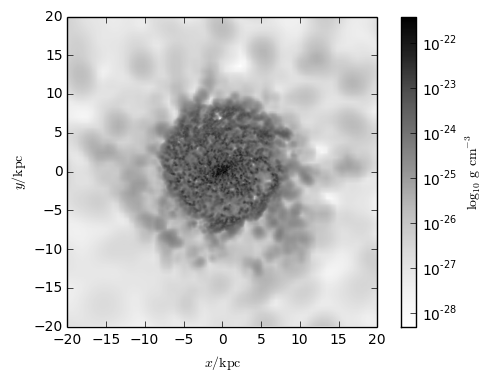

In [58]:
sph.image(h[1].g,qty="rho",units="g cm^-3",width=40,cmap="Greys")

#### Integrated density

The next logical step is to ask, well now i know what a slice looks like, what about the whole thing? For that we plot the integrated density.

center on the largest halo and align the disk

In [59]:
pynbody.analysis.angmom.faceon(h[1])

INFO:pynbody.analysis.angmom:Finding halo center...
INFO:pynbody.analysis._com:Initial rough COM=[ 0.57355422 -0.86835519  0.83634931]
INFO:pynbody.analysis.halo:Final SSC=[-0.00057594 -0.00041559 -0.00070086]
INFO:pynbody.analysis.angmom:... cen=[-0.00057594 -0.00041559 -0.00070086]
INFO:pynbody.analysis.halo:Finding halo velocity center...
INFO:pynbody.analysis.angmom:Calculating angular momentum vector...
INFO:pynbody.analysis.angmom:Transforming simulation...
INFO:pynbody.analysis.angmom:...done!


create an image of gas density integrated down the line of site (z axis)

INFO:pynbody.sph:Rendering image on 4 threads...


SimArray([[ 0.00025479,  0.00025449,  0.00025419, ...,  0.00048269,
         0.0004822 ,  0.00048171],
       [ 0.00025394,  0.00025365,  0.00025336, ...,  0.00048959,
         0.00048939,  0.00048919],
       [ 0.00025309,  0.00025281,  0.00025254, ...,  0.0004965 ,
         0.00049658,  0.00049667],
       ..., 
       [ 0.00040271,  0.00039965,  0.00039658, ...,  0.00030772,
         0.0003085 ,  0.00030928],
       [ 0.00040119,  0.00039815,  0.00039512, ...,  0.00030214,
         0.00030276,  0.00030338],
       [ 0.00039966,  0.00039666,  0.00039367, ...,  0.00029657,
         0.00029703,  0.00029748]], dtype=float32, 'g cm**-2')

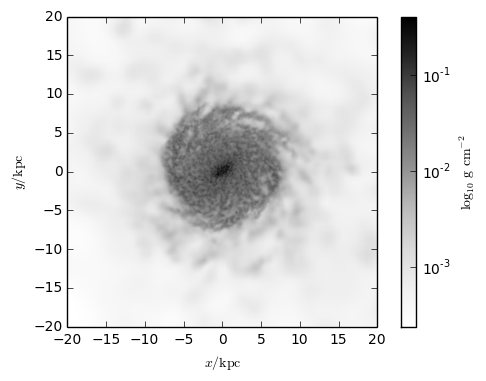

In [60]:
sph.image(h[1].g,qty="rho",units="g cm^-2",width=40,cmap="Greys")

#### Temperature slice

OK, we are done with density, the next thing to think about is the temperature of the system. Temperature is an interesting thing, especially in elliptical galaxies, so being able to visually inspect how the temperature varies within the simulation can be very powerful. For this we look at the galaxy side-on.

center on the largest halo and align the disk

In [61]:
pynbody.analysis.angmom.sideon(h[1])

INFO:pynbody.analysis.angmom:Finding halo center...
INFO:pynbody.analysis._com:Initial rough COM=[ 0.5741104  -0.8679531   0.83704974]
INFO:pynbody.analysis.halo:Final SSC=[ -4.33680869e-19   4.33680869e-19   1.30104261e-18]
INFO:pynbody.analysis.angmom:... cen=[ -4.33680869e-19   4.33680869e-19   1.30104261e-18]
INFO:pynbody.analysis.halo:Finding halo velocity center...
INFO:pynbody.analysis.angmom:Calculating angular momentum vector...
INFO:pynbody.analysis.angmom:Transforming simulation...
INFO:pynbody.analysis.angmom:...done!


create a simple slice showing the gas temperature

INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.sph:Rendering image on 4 threads...


SimArray([[ 2344718.25,  2343485.  ,  2335722.5 , ...,  4514780.  ,
         4504527.5 ,  4494944.5 ],
       [ 2299376.  ,  2298322.25,  2298845.75, ...,  4525193.5 ,
         4513462.  ,  4508879.  ],
       [ 2255172.25,  2283667.5 ,  2294309.75, ...,  4527252.5 ,
         4523424.5 ,  4521017.  ],
       ..., 
       [ 6012330.  ,  5872371.  ,  5760184.5 , ...,  3880311.  ,
         3868144.  ,  3846709.  ],
       [ 5984751.5 ,  5858838.  ,  5744096.  , ...,  3850695.75,
         3833322.  ,  3799236.25],
       [ 5968151.  ,  5838813.5 ,  5724488.  , ...,  3804759.  ,
         3782393.75,  3764506.5 ]], dtype=float32, 'K')

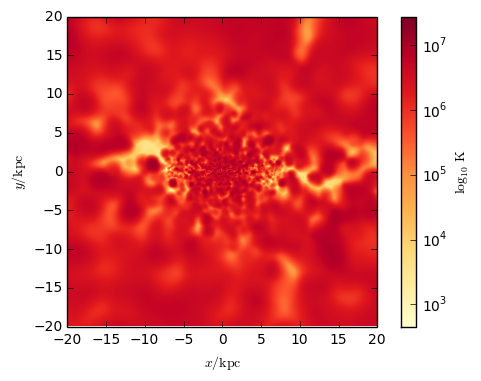

In [62]:
sph.image(h[1].g,qty="temp",width=40,cmap="YlOrRd", denoise=True,approximate_fast=False)

#### Vector plots

This allows you to add velocity vectors or flow lines to a plot. This is very useful if you're interested in how the star are moving relative to some under lying parameter space. Here we plot the gas density with the velocity vectors overlaid, and the stream visualization.

center on the largest halo and align the disk

In [63]:
pynbody.analysis.angmom.sideon(h[1])

INFO:pynbody.analysis.angmom:Finding halo center...
INFO:pynbody.analysis._com:Initial rough COM=[ 0.5741104   0.83704974  0.8679531 ]
INFO:pynbody.analysis.halo:Final SSC=[ -4.33680869e-19  -4.33680869e-19  -4.33680869e-19]
INFO:pynbody.analysis.angmom:... cen=[ -4.33680869e-19  -4.33680869e-19  -4.33680869e-19]
INFO:pynbody.analysis.halo:Finding halo velocity center...
INFO:pynbody.analysis.angmom:Calculating angular momentum vector...
INFO:pynbody.analysis.angmom:Transforming simulation...
INFO:pynbody.analysis.angmom:...done!


INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.analysis.angmom:Finding halo center...
INFO:pynbody.analysis._com:Initial rough COM=[ 0.5741104   0.83704974  0.8679531 ]
INFO:pynbody.analysis.halo:Final SSC=[ -4.33680869e-19  -4.33680869e-19   4.33680869e-19]
INFO:pynbody.analysis.angmom:... cen=[ -4.33680869e-19  -4.33680869e-19   4.33680869e-19]
INFO:pynbody.analysis.halo:Finding halo velocity center...
INFO:pynbody.analysis.angmom:Calculating angular momentum vector...
INFO:pynbody.analysis.angmom:Transforming simulation...
INFO:pynbody.analysis.angmom:...done!
INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.sph:Rendering image on 4 threads...
INFO:pynbody.sph:Rendering image on 4 threads...


SimArray([[ 6286.59033203,  6272.98388672,  6259.37695312, ...,
           34.90309906,    32.54122162,    30.1793499 ],
       [ 6475.91015625,  6482.51611328,  6489.12207031, ...,
           38.55041504,    36.13684464,    33.72327042],
       [ 6665.22998047,  6692.04882812,  6718.86767578, ...,
           42.19773865,    39.73246765,    37.26720047],
       ..., 
       [  125.72645569,   127.64278412,   129.55911255, ...,
         1979.7644043 ,  2067.60546875,  2155.44628906],
       [  117.38918304,   119.11956024,   120.8499527 , ...,
         1924.22277832,  2016.44555664,  2108.66870117],
       [  109.05191803,   110.59635162,   112.14078522, ...,
         1868.68078613,  1965.28564453,  2061.890625  ]], dtype=float32, 'Msol kpc**-2')

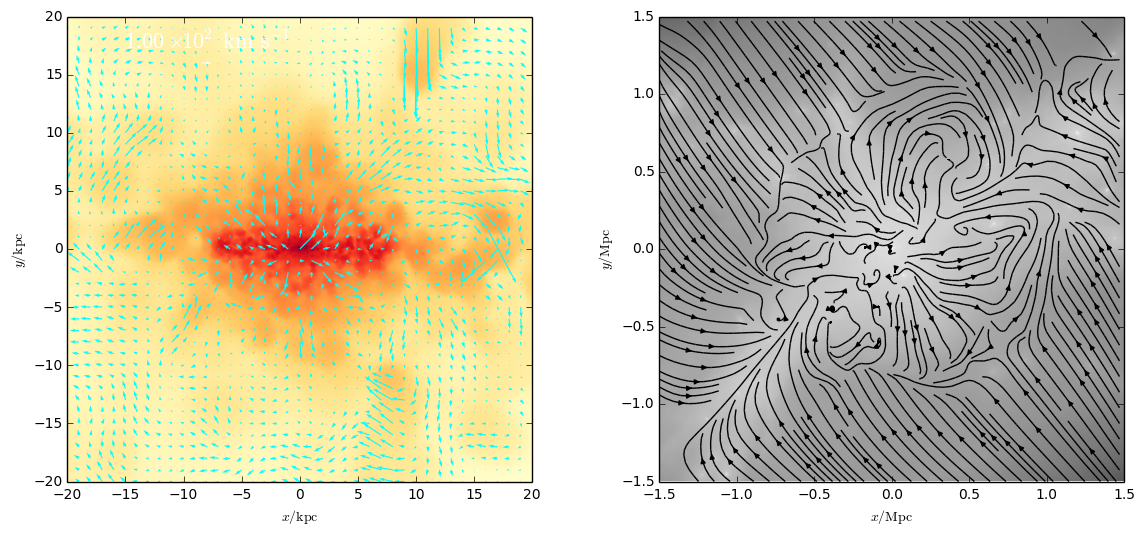

In [64]:
f, axs = plt.subplots(1,2,figsize=(14,6))

# create a simple slice showing the gas density, with velocity vectors overlaid
sph.velocity_image(h[1].g, vector_color="cyan", qty="rho",width=40,cmap="YlOrRd",
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = False)

#you can also make a stream visualization instead of a quiver plot
pynbody.analysis.angmom.faceon(h[1])
s['pos'].convert_units('Mpc')
sph.velocity_image(s.g, width='3 Mpc', cmap = "Greys_r", mode='stream', units='Msol kpc^-2',
                   density = 2.0, vector_resolution=100, vmin=1e-1,subplot=axs[1],
                   show_cbar=False, vector_color='black')

#### Multi-band images

Now this is one of the coolest things that pynbody can do, turn a simulation into something that looks like a composite image from the Hubble Space Telescope. These images are called multi-band images, or false colour images. The name false colour is an apt one as the image used non-visible bands of light and converts them to visible. Thus, this is not what you would see if you pointed a telescope at these things, but gives allot more information about the distribution of different stellar components.

center on the largest halo and align the disk

In [65]:
pynbody.analysis.angmom.sideon(h[1])

INFO:pynbody.analysis.angmom:Finding halo center...
INFO:pynbody.analysis._com:Initial rough COM=[-0.00103463 -0.00011174  0.00083705]
INFO:pynbody.analysis.halo:Final SSC=[  3.62361272e-07  -2.23589431e-06   1.82449794e-06]
INFO:pynbody.analysis.angmom:... cen=[  3.62361272e-07  -2.23589431e-06   1.82449794e-06]
INFO:pynbody.analysis.halo:Finding halo velocity center...
INFO:pynbody.analysis.angmom:Calculating angular momentum vector...
INFO:pynbody.analysis.angmom:Transforming simulation...
INFO:pynbody.analysis.angmom:...done!


create an image using the default bands (i, v, u) (for more info on what this means have a look at this wikipedia page: https://en.wikipedia.org/wiki/Photometric_system)

In [66]:
pynbody.plot.stars.render(h[1],width='10 kpc')

INFO:pynbody.snapshot:Deriving array i_lum_den
INFO:pynbody.snapshot:Deriving array i_mag
INFO:pynbody.snapshot:Deriving array age
INFO:pynbody.snapshot.tipsy:Attempting to load auxiliary array testdata/g1.77e12.00784.massform
INFO:pynbody.snapshot:Converting massform units from 8.93e+16 Msol to Msol
INFO:pynbody.snapshot:Deriving array rho
INFO:pynbody.sph:Building tree with leafsize=16
INFO:pynbody.sph:Tree build done in  1.34 s
INFO:pynbody.sph:Calculating SPH density
INFO:pynbody.snapshot:Deriving array smooth
INFO:pynbody.sph:Smoothing with 32 nearest neighbours
INFO:pynbody.sph:Smoothing done in  3.98s
INFO:pynbody.snapshot:Converting None units from Mpc to kpc


RuntimeError: Buffer overflow in smoothing operation. This probably means that your smoothing lengths are too large compared to the number of neighbours you specified.